In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
S = pd.read_excel('data/s1.xlsx')

In [5]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,35,NaN,15,40,-81,0.348434,0.01,0.1,plant
1,23,NaN,9,40,-81,0.346003,0.01,0.1,plant
2,23,NaN,12,40,-81,0.374041,0.01,0.1,plant
3,20,NaN,6,40,-81,0.351241,0.01,0.1,plant
4,20,NaN,8,40,-81,0.358171,0.01,0.1,plant


In [6]:
S.fillna(100, inplace=True)

## Scaler

In [7]:
from sklearn.preprocessing import StandardScaler, Normalizer, LabelBinarizer
from sklearn.decomposition import PCA

In [8]:
scaler = StandardScaler()
norm = Normalizer(norm='l2')
pca = PCA(n_components=2)
lbin = LabelBinarizer()

X = S[S.columns.difference(['organism'])]

In [9]:
models = [norm, pca]
X2 = X.copy()
for m in models:
    X2 = m.fit_transform(X2)

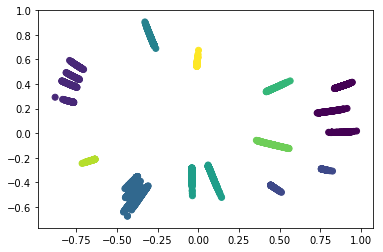

In [35]:
plt.scatter(X2[:,0], X2[:,1], c=clusters['hierarchical'])
plt.show()

## Clustering

In [20]:
k = 10

In [29]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering

In [31]:
models = {
    'kmeans': KMeans(n_clusters=k),
    'ap': AffinityPropagation(),
    'hierarchical': AgglomerativeClustering(n_clusters=k, linkage='complete')
}

In [32]:
clusters = {}

In [33]:
for mod, cls in models.items():
    clusters[mod] = cls.fit_predict(X2)

In [34]:
clusters['kmeans']

array([3, 3, 3, ..., 6, 8, 8], dtype=int32)

In [36]:
from sklearn.metrics import classification_report

In [39]:
report = classification_report(clusters['kmeans'], clusters['hierarchical'])